In [1]:
# %config Completer.use_jedi = False  # enable code auto-completion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score    # function to calculate mean squared error 

In [2]:
df = pd.read_excel("earnings.xlsx")
print(df)

     Answers   Views                    Topic  External Traffic Percentage  \
0         36  247835            Social / News                            3   
1         82  332393      Health / Psychology                            2   
2         41  455160            Social / News                           19   
3          7  106588       Culture / Politics                            2   
4          3   65732            Social / News                            1   
..       ...     ...                      ...                          ...   
495        1    1134       Culture / Politics                           81   
496        3    1339      Education / Science                           93   
497        5    3159  Entertainment / Hobbies                           22   
498       11    4139      Love / Relationship                            4   
499        6    1068             Life / Habit                           94   

     Earnings                                   Question detail

In [3]:
external_traffic_percentage = df["External Traffic Percentage"].to_numpy()
topics = df["Topic"].to_numpy()
answers = df["Answers"].to_numpy()
views = df["Views"].to_numpy()
earnings = df["Earnings"].to_numpy()

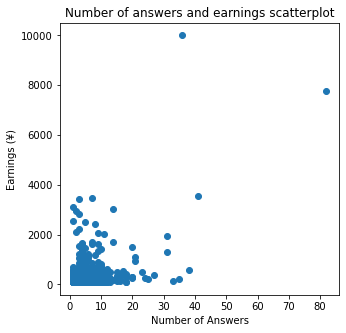

In [4]:
fig, axes = plt.subplots(figsize=(5,5))
axes.scatter(answers, earnings);
axes.set_xlabel("Number of Answers")
axes.set_ylabel("Earnings (¥)")
axes.set_title("Number of answers and earnings scatterplot")
plt.show()

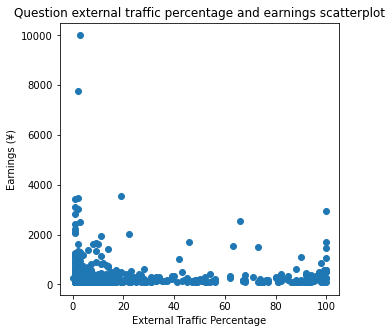

In [5]:
fig, axes = plt.subplots(figsize=(5,5))
axes.scatter(external_traffic_percentage, earnings);
axes.set_xlabel("External Traffic Percentage")
axes.set_ylabel("Earnings (¥)")
axes.set_title("Question external traffic percentage and earnings scatterplot")
plt.show()

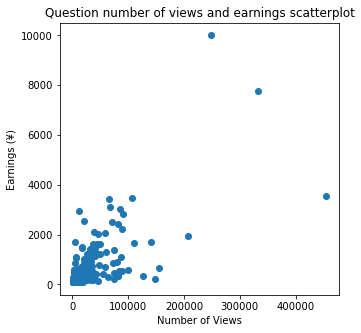

In [6]:
fig, axes = plt.subplots(figsize=(5,5))
axes.scatter(views, earnings);
axes.set_xlabel("Number of Views")
axes.set_ylabel("Earnings (¥)")
axes.set_title("Question number of views and earnings scatterplot")
plt.show()

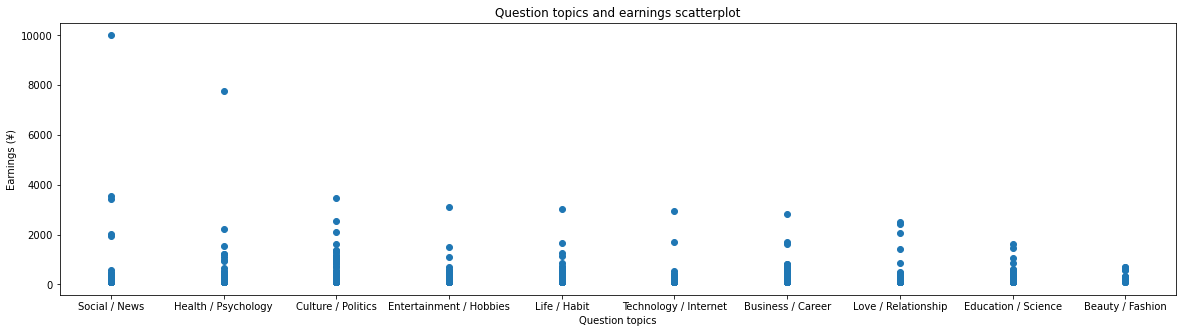

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(20,5))
axes.scatter(topics, earnings);
axes.set_xlabel("Question topics")
axes.set_ylabel("Earnings (¥)")
axes.set_title("Question topics and earnings scatterplot")
plt.show()

In [8]:
# Huber Regression, Ridge Regression model comparison function

def model_comparison(X, y, feature):
    tr_error = { "Huber": [], "Ridge": [] }
    val_error = { "Huber": [], "Ridge": [] }
    slope = { "Huber": [], "Ridge": [] }
    intercept = { "Huber": [], "Ridge": [] }
    predictors = { "Huber": [], "Ridge": [] }

    # In the first step we will split the data in testing and remaining dataset
    X_rem, X_test, y_rem, y_test = train_test_split(X, y, train_size=0.90, random_state = 42)

    fig, axes = plt.subplots(5, 1, figsize=(5,25))

    K = 5  # Number of splits
    kf = KFold(n_splits=K, shuffle=True, random_state=42)    # Create a KFold object with 'K' splits
    i = 0
    for train_indices, val_indices in kf.split(X_rem):
        X_train = X_rem[train_indices,:]    # Get the training set    
        X_val = X_rem[val_indices,:]    # Get the validation set
        y_train = y_rem[train_indices]    # Get the training set    
        y_val = y_rem[val_indices]    # Get the validation set

        # for Huber Regression model training
        HuberModel = HuberRegressor(epsilon = 1)
        fitHuberModel = HuberModel.fit(X_train, y_train)
        predictors["Huber"].append(fitHuberModel)
        slope["Huber"].append(fitHuberModel.coef_[0])
        intercept["Huber"].append(fitHuberModel.intercept_)    
        y_pred_train_Huber = fitHuberModel.predict(X_train)
        # for Huber Regression validation
        y_pred_val_Huber = fitHuberModel.predict(X_val)
        tr_error["Huber"].append(mean_squared_error(y_train, y_pred_train_Huber))
        val_error["Huber"].append(mean_squared_error(y_val, y_pred_val_Huber))

        # for Ridge Regression model training
        RidgeModel = Ridge(alpha=1, solver='svd')
        fitRidgeModel = RidgeModel.fit(X_train, y_train)
        predictors["Ridge"].append(fitRidgeModel)
        slope["Ridge"].append(fitRidgeModel.coef_[0])
        intercept["Ridge"].append(fitRidgeModel.intercept_)  
        y_pred_train_Ridge = fitRidgeModel.predict(X_train)
        # for Ridge Regression validation
        y_pred_val_Ridge = fitRidgeModel.predict(X_val)
        tr_error["Ridge"].append(mean_squared_error(y_train, y_pred_train_Ridge))
        val_error["Ridge"].append(mean_squared_error(y_val, y_pred_val_Ridge))
        
        # Start plotting
        axes[i].set_title("Huber and Ridge Regression Model on Earnings - " + feature + " (K = " + str(i+1) + ")")
        axes[i].set_xlabel("Number of " + feature)
        axes[i].set_ylabel("Earnings (¥)")
        axes[i].scatter(X_train, y_train, color="blue", label = "Training datapoints")
        axes[i].scatter(X_val, y_val, color="red", label = "Validation datapoints")
        axes[i].scatter(X_test, y_test, color="black", label = "Testing datapoints")
        axes[i].plot(X_train, y_pred_train_Huber, color="yellow", linewidth=3, label = "Huber Regression")
        axes[i].plot(X_train, y_pred_train_Ridge, color="green", linewidth=3, label = "Ridge Regression")
        axes[i].legend()
        i += 1
    
    # Printing out the result
    best_predictor_index_Huber = val_error["Huber"].index(min(val_error["Huber"]))
    best_predictor_index_Ridge = val_error["Ridge"].index(min(val_error["Ridge"]))
    y_pred_test_Huber = predictors["Huber"][best_predictor_index_Huber].predict(X_test)
    y_pred_test_Ridge = predictors["Ridge"][best_predictor_index_Ridge].predict(X_test)
    err_train = sum(tr_error["Huber"])/len(tr_error["Huber"])
    err_val = sum(val_error["Huber"])/len(val_error["Huber"])
    err_test = mean_squared_error(y_test, y_pred_test_Huber)
    
    print("Huber Regression. Error measured by MSE")
    print(f'Slopes for each K: {slope["Huber"]}')
    print(f'Slope by the best model predictor: {slope["Huber"][best_predictor_index_Huber]}')
    print(f'Intercepts for each K: {intercept["Huber"]}')
    print(f'Intercept by the best model predictor: {intercept["Huber"][best_predictor_index_Huber]}')
    print(f'Training error for each K: {tr_error["Huber"]}')
    print(f'Average training error: {err_train}')
    print(f'Training error by the best model predictor: {tr_error["Huber"][best_predictor_index_Huber]}')
    print(f'Validation error for each K: {val_error["Huber"]}')
    print(f'Average validation error: {err_val}')
    print(f'Validation error by the best model predictor: {val_error["Huber"][best_predictor_index_Huber]}')
    print(f'Testing error by the best model predictor: {err_test}\n')

    err_train = sum(tr_error["Ridge"])/len(tr_error["Ridge"])
    err_val = sum(val_error["Ridge"])/len(val_error["Ridge"])
    err_test = mean_squared_error(y_test, y_pred_test_Ridge)
    print("Ridge Regression. Error measured by MSE")
    print(f'Slopes for each K: {slope["Ridge"]}')
    print(f'Slope by the best model predictor: {slope["Ridge"][best_predictor_index_Ridge]}')
    print(f'Intercepts for each K: {intercept["Ridge"]}')
    print(f'Intercept by the best model predictor: {intercept["Ridge"][best_predictor_index_Ridge]}')
    print(f'Training error for each K: {tr_error["Ridge"]}')
    print(f'Average training error: {err_train}')
    print(f'Training error by the best model predictor: {tr_error["Ridge"][best_predictor_index_Ridge]}')
    print(f'Validation error for each K: {val_error["Ridge"]}')
    print(f'Average validation error: {err_val}')
    print(f'Validation error by the best model predictor: {val_error["Ridge"][best_predictor_index_Ridge]}')
    print(f'Testing error by the best model predictor: {err_test}\n')

    plt.show()



Huber Regression. Error measured by MSE
Slopes for each K: [0.017534499673096397, 0.01311903753088568, 0.015115781958991097, 0.014413660208038399, 0.021387415341738082]
Slope by the best model predictor: 0.014413660208038399
Intercepts for each K: [68.85232665236278, 91.50678268329034, 78.10118715618137, 88.05356873260702, 3.4000506344851755e-06]
Intercept by the best model predictor: 88.05356873260702
Training error for each K: [165997.6972830831, 164639.21833958148, 149925.02719566852, 188288.93766179125, 201386.59896352643]
Average training error: 174047.49588873016
Training error by the best model predictor: 188288.93766179125
Validation error for each K: [176166.82710417057, 240409.6608337491, 254023.99257064867, 109014.11301330589, 129830.72012304871]
Average validation error: 181889.0627289846
Validation error by the best model predictor: 109014.11301330589
Testing error by the best model predictor: 1218286.7543276625

Ridge Regression. Error measured by MSE
Slopes for each K: [

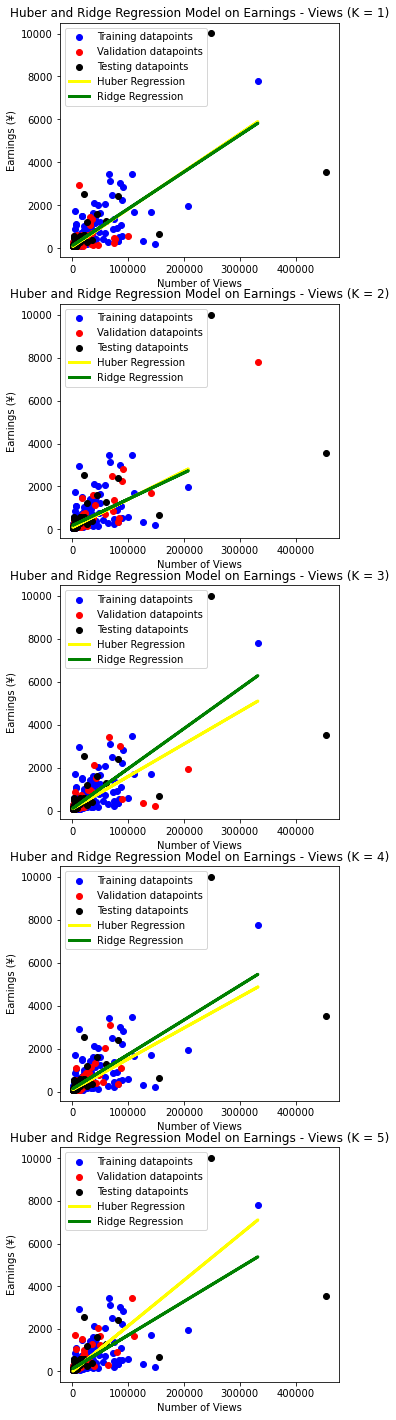

In [9]:
# Comparing Huber and Ridge Regression Model on feature Views - label Earnings
X_views = df["Views"].to_numpy().reshape(-1,1)
y_earnings = earnings
feature = "Views"
model_comparison(X_views, y_earnings, feature)

Huber Regression. Error measured by MSE
Slopes for each K: [9.249217372014055, 8.33326511888856, 9.000007097274038, 8.000000246814084, 8.333330674895905]
Slope by the best model predictor: 9.249217372014055
Intercepts for each K: [149.27113039436992, 151.33469762224425, 146.99999290002987, 157.9999981617545, 151.33338598430547]
Intercept by the best model predictor: 149.27113039436992
Training error for each K: [420880.2791054908, 256788.19490515735, 379984.37003062177, 410932.62718359794, 386950.34381525335]
Average training error: 371107.1630080242
Training error by the best model predictor: 420880.2791054908
Validation error for each K: [161739.34590453136, 835012.422947631, 335115.2390005152, 213800.0334341631, 314364.765473144]
Average validation error: 372006.36135199695
Validation error by the best model predictor: 161739.34590453136
Testing error by the best model predictor: 2305027.2499265973

Ridge Regression. Error measured by MSE
Slopes for each K: [46.48828481113721, 11.00

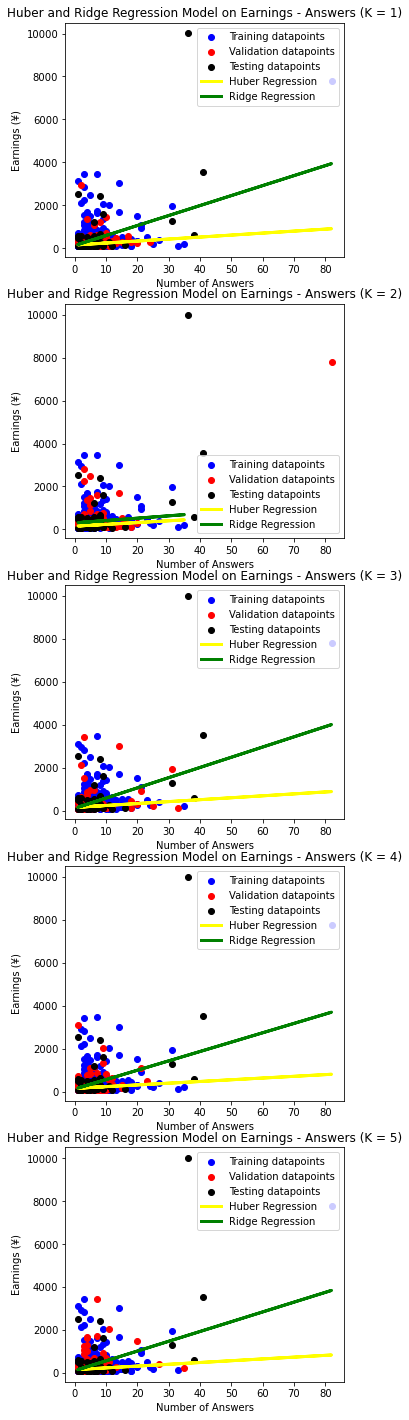

In [10]:
# Comparing Huber and Ridge Regression Model on feature Answers - label Earnings
X_views = df["Answers"].to_numpy().reshape(-1,1)
y_earnings = earnings
feature = "Answers"
model_comparison(X_views, y_earnings, feature)

Logistic Regression. Accuracy score measured by accuracy_score
Training accuracy for each K: [0.40555555555555556, 0.37222222222222223, 0.4, 0.38333333333333336, 0.38055555555555554]
Validation accuracy for each K: [0.3111111111111111, 0.43333333333333335, 0.3333333333333333, 0.3888888888888889, 0.23333333333333334]
Average training accuracy: 0.3883333333333333
Average validation accuracy: 0.33999999999999997
Testing score by the best model predictor: 0.4

SVM Regression. Accuracy score measured by accuracy_score
Training accuracy for each K: [0.40555555555555556, 0.3972222222222222, 0.40555555555555556, 0.3861111111111111, 0.41388888888888886]
Validation accuracy for each K: [0.3111111111111111, 0.36666666666666664, 0.3111111111111111, 0.3888888888888889, 0.3333333333333333]
Average training accuracy: 0.40166666666666667
Average validation accuracy: 0.3422222222222222
Testing score by the best model predictor: 0.4

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

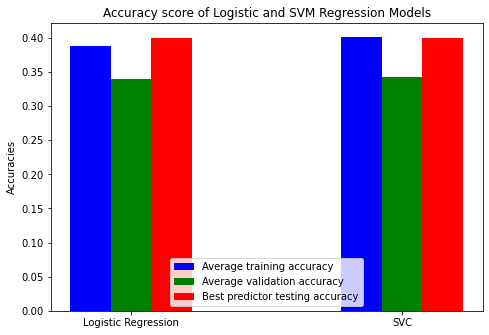

In [11]:
copydf = df.copy()
# copydf['Topic'] = copydf['Topic'].map({"Social / News": 0, 'Health / Psychology': 1, 'Culture / Politics': 2, 'Entertainment / Hobbies': 3, 'Life / Habit': 4, 'Technology / Internet': 5, 'Business / Career': 6, 'Love / Relationship': 7, 'Education / Science': 8, 'Beauty / Fashion': 9})
copydf['Topic'] = copydf['Topic'].map({"Social / News": 0, 'Health / Psychology': 1, 'Culture / Politics': 0, 'Entertainment / Hobbies': 2, 'Life / Habit': 1, 'Technology / Internet': 2, 'Business / Career': 0, 'Love / Relationship': 1, 'Education / Science': 2, 'Beauty / Fashion': 2})
X_topics = copydf["Topic"].to_numpy()
y_earnings = earnings.reshape(-1,1)

tr_acc = { "Logistic": [], "Svm": [] }
val_acc = { "Logistic": [], "Svm": [] }
predictors = { "Logistic": [], "Svm": [] }

X_rem, X_test, y_rem, y_test = train_test_split(y_earnings, X_topics, train_size=0.9, random_state = 42)
K = 5  # Number of splits
kf = KFold(n_splits=K, shuffle=True, random_state=42)    # Create a KFold object with 'K' splits
i = 0
for train_indices, val_indices in kf.split(X_rem):
    X_train = X_rem[train_indices,:]    # Get the training set    
    X_val = X_rem[val_indices,:]    # Get the validation set
    y_train = y_rem[train_indices]    # Get the training set    
    y_val = y_rem[val_indices]    # Get the validation set

    # for Logistic Regression model training
    LogisticModel = LogisticRegression(max_iter = 1000)
    fitLogisticModel = LogisticModel.fit(X_train, y_train)
    predictors["Logistic"].append(fitLogisticModel)
    y_pred_train_Logistic = fitLogisticModel.predict(X_train)
    # for Logistic Regression validation
    y_pred_val_Logistic = fitLogisticModel.predict(X_val)
    tr_acc["Logistic"].append(accuracy_score(y_train, y_pred_train_Logistic))
    val_acc["Logistic"].append(accuracy_score(y_val, y_pred_val_Logistic))
    
    # for SVM Regression model training
    SvmModel = SVC(max_iter = 1000)
    fitSvmModel = SvmModel.fit(X_train, y_train)
    predictors["Svm"].append(fitSvmModel)
    y_pred_train_Svm = fitSvmModel.predict(X_train)
    # for SVM Regression validation
    y_pred_val_Svm = fitSvmModel.predict(X_val)
    tr_acc["Svm"].append(accuracy_score(y_train, y_pred_train_Svm))
    val_acc["Svm"].append(accuracy_score(y_val, y_pred_val_Svm))

best_predictor_index_Logistic = val_acc["Logistic"].index(max(val_acc["Logistic"]))
best_predictor_index_Svm = val_acc["Svm"].index(max(val_acc["Svm"]))
y_pred_test_Logistic = predictors["Logistic"][best_predictor_index_Logistic].predict(X_test)
y_pred_test_Svm = predictors["Svm"][best_predictor_index_Svm].predict(X_test)

acc_train_Logistic = sum(tr_acc["Logistic"])/len(tr_acc["Logistic"])
acc_val_Logistic = sum(val_acc["Logistic"])/len(val_acc["Logistic"])
acc_test_Logistic = accuracy_score(y_test, y_pred_test_Logistic)
print("Logistic Regression. Accuracy score measured by accuracy_score")
print(f'Training accuracy for each K: {tr_acc["Logistic"]}')
print(f'Validation accuracy for each K: {val_acc["Logistic"]}')
print(f'Average training accuracy: {acc_train_Logistic}')
print(f'Average validation accuracy: {acc_val_Logistic}')
print(f'Testing score by the best model predictor: {acc_test_Logistic}\n')

acc_train_Svm = sum(tr_acc["Svm"])/len(tr_acc["Svm"])
acc_val_Svm = sum(val_acc["Svm"])/len(val_acc["Svm"])
acc_test_Svm = accuracy_score(y_test, y_pred_test_Svm)
print("SVM Regression. Accuracy score measured by accuracy_score")
print(f'Training accuracy for each K: {tr_acc["Svm"]}')
print(f'Validation accuracy for each K: {val_acc["Svm"]}')
print(f'Average training accuracy: {acc_train_Svm}')
print(f'Average validation accuracy: {acc_val_Svm}')
print(f'Testing score by the best model predictor: {acc_test_Svm}\n')

earnings_test = np.arange(0, 10001, 20)
earnings_predict = predictors["Svm"][best_predictor_index_Logistic].predict(earnings_test.reshape(-1,1))
np.set_printoptions(threshold = np.inf)
print(earnings_predict)
# plot bar results
acc_Logistic = list[acc_train_Logistic, acc_val_Logistic, acc_test_Logistic]
acc_Svm = list[acc_train_Svm, acc_val_Svm, acc_test_Svm]
acc_train = [acc_train_Logistic, acc_train_Svm]
acc_val = [acc_val_Logistic, acc_val_Svm]
acc_test = [acc_test_Logistic, acc_test_Svm]
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.15, acc_train, color = 'b', width = 0.15, label = "Average training accuracy")
ax.bar(X, acc_val, color = 'g', width = 0.15, label = "Average validation accuracy")
ax.bar(X + 0.15, acc_test, color = 'r', width = 0.15, label = "Best predictor testing accuracy")
ax.set_xticks(X, labels = ("Logistic Regression","SVC"))
#ax.set_xticklabels(["LogisticRegression","SVC"])
ax.set_ylabel("Accuracies")
ax.set_title("Accuracy score of Logistic and SVM Regression Models")
ax.legend(loc="lower center")